In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
plt.style.use('seaborn')
data=pd.read_excel("Data.xlsx",header=None)
#Reading data from excel file

In [2]:
data=data[1:]
data=data.rename(columns={0:"Month",1:"Price"})
#Renaming the column names

In [3]:
data.head()

,Month,Price
1,140,68.61
2,139,69.08
3,138,65.81
4,137,64.07
5,136,59.8


In [4]:
mean=data['Price'].mean()
mean

53.93498220640573

In [5]:
data['Price'].std()

31.71711000756256

In [6]:
data['Price'].max()

125.28

In [7]:
data['Price'].min()

9

In [8]:
n=data['Price'].count()

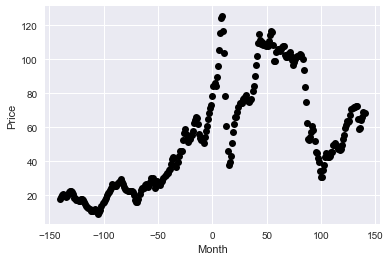

In [63]:
plt.plot(data['Month'], data['Price'], 'o', color='black');
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()
#Plotting Price vs Month to analyze the data given
#The month are taken from 

As we can see from the graph that it is not stationary.
Stationary implies mean, variance and covariance is constant over periods

To find out if the series is stationaly or not (mathematically) , we use ACF(Auto Correlation Function) plot

Autocorrelation is correlation between the Y(t) and Y(t-1) series i.e. between data['Price'] nad data['Price'].shift(1)

In [101]:
#To install statsmodel use this in cmd : conda install -c conda-forge statsmodels
from statsmodels.graphics.tsaplots import plot_acf

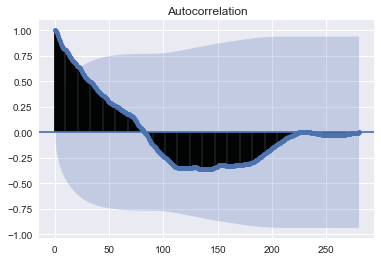

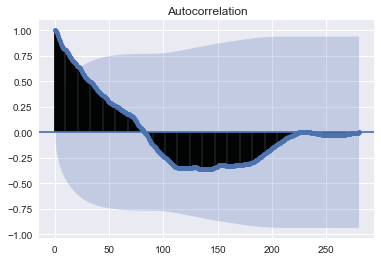

In [102]:
plot_acf(data['Price'].astype('float'))

Autocorrelation for stationary time series should be 1 at x=0 and then immediately become zero or neagative

In [71]:
#Converting series to stationary series
data['diff1']=data['Price'].diff(periods=1)
D1=data['diff1'][1:]

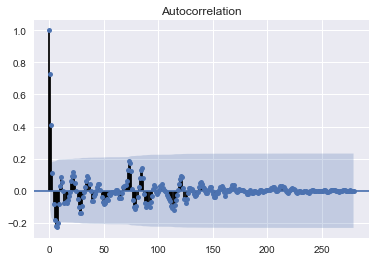

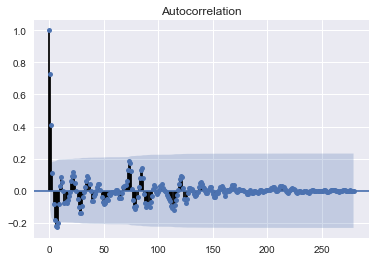

In [72]:
plot_acf(D1.astype('float'))

This shows that the series D1 is stationary

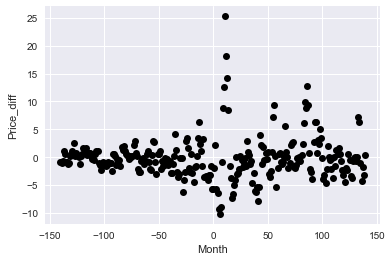

In [141]:
plt.plot(data['Month'][1:], D1, 'o', color='black')
plt.xlabel('Month')
plt.ylabel('Price_diff')
plt.show()

The above graph also shows D1 is stationary as mean for different periods appears to be similar.

In [164]:
X=pd.DataFrame(data['Month'])
Y=data['Price']
X.count()

Month    281
dtype: int64

In [250]:
X_train=X[:270]
Y_train=Y[:270]
X_test=X[270:]
Y_test=Y[270:]
Y_test.count()
#X_train

11

In [251]:
X_test.count()

Month    11
dtype: int64

AutoRegressive Model

In [253]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model=AR(np.array(Y_train))
f=model.fit()

In [255]:
predictions=f.predict(start=270,end=280)
len(predictions)

11

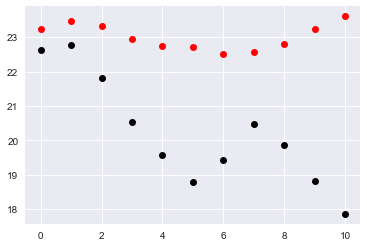

In [256]:
plt.plot(np.array(Y_test), 'o', color='black')
plt.plot(predictions, 'o', color='red')

In [259]:
#ARIMA has 3 parameters (p,d,q)
#p is periods taken for autoregressive model
#d is Integerated order
#q is periods taken data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAW8AAAD3CAYAAADSftWOAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAEkBJREFUeJzt3XFs3Gd9x/G3ybWpylzkDa9kWrX8sfmJLEtDYxIYCJc/xlhWDXbM02Cq2IiKMqkge4lEt9BogLpJSCTEW1fVFCwYWqlUw0kFweiGMOvIpk0TTCNzHg+maX90MC81TVgg1K73x/kcx7V9zt397nfP7/d+/eV7znf3fRTfJ8/veX6/3zOwtraGJCktL8m7AEnSzTO8JSlBhrckJcjwlqQEGd6SlKBKLz5kaelKR6e0DA3dzvLy1W6Vk4Sy9bls/QX7XBad9Hl4eHBgp+eSGHlXKvvyLqHnytbnsvUX7HNZZNXnJMJbknQjw1uSEmR4S1KCDG9JSpDhLUkJMrwlKQP763MMVcehUmGoOs7++lxX378n53lLUpnsr89xx/FjG48rCxe44/gxLgPXahNd+QxH3pLUZbefO7N9+/TZrn2G4S1JXbZv8eJNtbfD8JakLlsdOXRT7e0wvLfRXGh4+YGhTBYaJBXb1amT27dPnujaZ7hguUUvFhokFdu12gSXacxxVxYvsjJyiKuTJ7qaIYb3FrstNBjekvbqWm2Ca7UJhocHWV660vX3d9pki14sNEhSpwzvLXqx0CBJnTK8t+jFQsNusr4qS1IxOOe9xeaFhn2LF1nNYKFhJy6WStorw3sbzYWGXnOxVNJe9fW0SdmmEFwslbqvqNdt9O3Iu4xTCKsjh6gsXNi2XdLNK3KO9O3Iuxc3duk3eS+WSkVT5Bzp2/Au4xTCtdoEl2dmWRkdg0qFldExLs/MJj9CkPJS5Bzp22mTsk4hZH1VllQmRc6Rvh15O4UgqVNFzpG+DW+nECR1anOOrBUsRwbW1tYy/5ClpSsdfcjw8CBLJZtCKFufy9ZfsM9l0Umfh4cHB3Z6btc57xDCLcAscBDYDzwIfAv4KDAA/AvwnhjjaluVSZLa0mra5B7gUozxMHAUeAj4E+BUjPF1wO3Am7MtUZK0VavwfgI4venxCvAbMca/DSHcCrwC+G5Wxal3inoVmlRUe5rzDiEMAk8Cj8YYHwsh/AzwN8BzwJtijJd2e/3KyupapbKvG/UqC48/Dm9/+4vbP/1peNvbel+PpKYd57xbhncI4S6gDjwcY5zd8ty9wOEY4+/s9h4uWN68XvZ5qDq+7bmwK6NjLM+f70kN/huXg32+6dfuGN67TpuEEO4EngLubwZ3COHJEMLPrf/KFeCFtqpS3yjyVWhSUbW6wvIUMAScDiE0577fB3wihPAj4Cpwb4b1qQeKfBWaVFS7hneMcRKY3Oap12VTjvJwderkDXde22gvwFVo6g/763ONm0QtXmRo5BBXp04W4kKZPPXtFZZ5qtfnqFbHOXBgiGp1nHrBz7wo8lVoyl/ztqyVhQuwurpxW1bPaOqMV1huUa/PcXybUejMzCy1HoZZWRZ2miOyyuJFVko2IivLv3E/LIjnKZcFyzI6t8P9f6cLcP/ffpP3iMxz23vDBfFsGN5bLO7wB7VTu9qX543yN//HMeChfKZ2Wvh2QbwzhvcWIzv8Qe3UrvblOSIr8g4r/abIt2XNU1+Hd3PhsFKp9GzhcGqHP7RJ/9C6Ls8RmYfyvePtnbPRt+HdXDhcWLjA6uoqCwsXOH78WOYBXqtNMDMzy+joGJVKhdHRsZ4vVpZFniMyD+V761ptorE4+fzzLM+fN7i7oG/DO8+Fw1ptgvn58zzzzLPMz583uDOS54isrIfyLtIWR9/uYenCYTnktWfntdoEl2nMce9bvMjqyCGuTp4o9IiwuUjb1FykvQyF7ndR9e3I24VDZa15KP+/zzzb00P55uiXSqWno18XaYulb8PbhUMVUZ7ntrtIWyx9G94uHKqI8hz9ukhbLH075w2NAK+tz4eW4TJiFV+eo19vQFYsfTvyloooz9GvNyArlr4eeUtFk/fot3l2j9LnyFvqIa82VLc48pZ6LK9z21UsjrwlKUGGtyQlyPCWpAQZ3pKUIMNbkhJkeEtSggxvSUqQ4S1JCTK8JSlBhrckJWjXy+NDCLcAs8BBYD/wIPBfwJ8Bq8A14B0xxu9mW6YkabNWI+97gEsxxsPAUeAhYBp4T4zxCPBZ4P5MK5QkvUirG1M9AWzen2kFeFuM8b83vf6HWRQmSdrZwNraWstfCiEMAk8Cj8YYH1tvey3wceANMcal3V6/srK6Vqns60K5klQqAzs90fKWsCGEu4A68PCm4P4t4H3A3a2CG2B5+ereS91GGbdBK1ufy9ZfsM9l0Umfh4cHd3yu1YLlncBTwLtjjF9eb7sHOA4ciTE+21ZFkqSOtFqwPAUMAadDCPMhhKdpnGkyCHx2ve0DWRdZJvX6HNXqOJVKhWp1nHp9rvWLJJXOriPvGOMkMNmjWkqvXp/j+Kb9DRcWLmw8rrlNlqRNvEinj5w7d2bb9unpsz2uRFK/M7z7yOLixZtql1RehncfGRk5dFPtksrL8O4jU1Mnt22fnDzR40ok9TvDu4/UahPMzMwyOjpGpVJhdHSMmZlZFyslvUjLi3TUW7XaBLXaRCkvZpC0d468JSlBhrckJcjwlqQEGd6SlCDDW5ISZHhLUoIMb0lKkOEtSQkyvCUpQYa3JCXI8JakBBnekpQgw1uSEmR4S1KCDG9JSpDhLUkJMrwlKUGGtyQlyPCWpAQZ3pKUoF03IA4h3ALMAgeB/cCDMcYn15/7CBBjjI9kXaQk6UatRt73AJdijIeBo8BDIYThEMIXgTdnXp0kaVu7jryBJ4C5TY9XgB8D3k8jzCVJORhYW1tr+UshhEHgSeDRGONj623vB76zl2mTlZXVtUplX4elSlLpDOz0RKuRNyGEu4A68HAzuG/W8vLVdl62YXh4kKWlKx29R2rK1uey9Rfsc1l00ufh4cEdn2u1YHkn8BTw7hjjl9v6dElS17UaeZ8ChoDTIYTT621HY4w/yLYsSdJudg3vGOMkMLnDc+/PoiBJUmtepCNJCTK8JSlBhrckJcjwlqQEGd6SlCDDW5ISZHhLUoIMb0lKkOEtAOr1OarVcQ4cGKJaHaden2v9Ikm5aXljKhVfvT7H8ePHNh4vLFzYeFyrTeRVlqRdOPIW586d2bZ9evpsjytR1jzCKg5H3mJx8eJNtStNHmEViyNvMTJy6KbalSaPsIrF8BZTUye3bZ+cPNHjSpQlj7CKxfAWtdoEMzOzjI6OUalUGB0dY2Zm1kPpgvEIq1ic8xbQCHDDutimpk7eMOfd5BFWmhx5SyXhEVaxOPKWSsQjrOJw5C1JCTK8JSlBhrckJcjwlqQEGd6SlCDDW5ISZHhLUoIMb0lKkOEtSQlqeYVlCOEWYBY4COwHHgT+DfgEsAZ8E7gvxvhCZlVKkm6wl5H3PcClGONh4CjwEHAWeGC9bQB4S3YlSpK22su9TZ4ANu+VtAK8Cvjq+uMvAr8M1Hd6g6Gh26lU9rVbIwDDw4MdvT5FZetz2foL9rkssuhzy/COMX4fIIQwSCPEHwA+HGNcW/+VK8DLdnuP5eWrHRU5PDzI0tKVjt4jNWXrc9n6C/a5LDrp826hv6cFyxDCXcBXgE/FGB8DNs9vDwLfa6sySaXQ3Pi4Uqm48XGXtAzvEMKdwFPA/THG2fXmr4cQjqz/fBR4OpvyJKWuufHxwsIFVldXNzY+NsA7s5eR9ylgCDgdQpgPIczTmDr5QAjh74FbuXFOXJI2uPFxNvYy5z0JTG7zVLX75UgqGjc+zoYX6UjKlBsfZ8PwlpSpqamT27a78XFnDG9JmXLj42y4AbGkzDU3Pi7jed5ZceQtSQkyvCUpQYa3cuWVd1J7nPNWbppX3jU1r7wDXMySWnDkrdx45Z3UPsNbufHKO6l9hrdy45V3UvsMb+WmrFfeuUirbnDBUrlpLkpOT59lcfEiIyOHmJw8UejFShdp1S0Da2trrX+rQ0tLVzr6kDJelVW2Ppelv9XqOAsLF17UPjo6xvz8+Rwq6q2y/Dtv1uFOOgM7Pee0idRDLtKqWwxvqYdcpFW3GN5SD5V1kVbdZ3hLPeTtUdUtnm0i9Zi3R1U3OPKWpAQZ3pKUIMNbkhJkeEtSggxvSUqQ4S1JCTK8JSlBezrPO4TwauBDMcYjIYRfAB4BrgHfACZjjC9kWKMkaYuWI+8QwnuBjwG3rTd9FJiKMR4GngN+O7vyJEnb2cu0ybeBt256/NMxxua9K78GvL7rVUmSdtVy2iTG+JkQwsFNTf8RQqjGGL8K/Brw0lbvMTR0O5XKvvarpHFP3LIpW5/L1l+wz2WRRZ/bubfJO4Hp9emUf6Ix972r5eWrbXzMdWW8B0TZ+ly2/oJ9LosON2PY8bl2zja5GzgWY7wb+Angr9uqSpLUtnbC+9+BL4QQzgOXY4xf6HJNktQ1zQ2fDxwYKtSGz3uaNokx/ifwmvWfPwd8LsOapJ6o1+c4d+7MxubHU1Mnva92wRR5w2cv0lEpNb/UCwsXWF1d3fhSF2VUpoZz585s2z49fbbHlXSf4a1SKvKXWtcVecNnw1ulVOQvta4r8obPhrdKqchfal1X5A2fDW+VUpG/1LquyBs+uwGxSqn55Z2ePrtxtsnk5IlCfKl1o+aGz0VjeKu0ivqlVjk4bSJJCTK8JSlBhrckJcjwlqQEGd6SlCDDW5ISZHhLUoIMb0lKkOEtSQkyvCUpQYa3JCXI8JakBBnekpQgw1uSEmR4S1KCDG9JSpDhLUkJMrwlKUGGtyQlaE97WIYQXg18KMZ4JITwSuARYAVYBO6NMb6QYY2SpC1ajrxDCO8FPgbctt70R8AHY4yvB/YDd2dXniRpO3uZNvk28NZNj78O/HgIYQAYBJ7PojBJ0s4G1tbWWv5SCOEg8HiM8TUhhLcDfw78D/AcUI0x/nC316+srK5VKvu6UK4klcrATk/sac57i2ngcIzxQgjhPuAMcN9uL1hevtrGx1w3PDzI0tKVjt4jNWXrc9n6C/a5LDrp8/Dw4I7PtXO2ybPA5fWfnwGG2ngPSSq0en2OanWcSqVCtTpOvT7X1fdvZ+R9L/B4CGEF+BHwrq5WJEmJq9fnOH782MbjhYULG49rtYmufMae5rw7tbR0paMP8VCr+MrWX7DPRVatjrOwcOFF7aOjY8zPn9/z+wwPD+445+1FOpLUZYuLF2+qvR2GtyR12cjIoZtqb4fhLUldNjV1ctv2yckTXfsMw1uSuqxWm2BmZpbR0TEqlQqjo2PMzMx2bbES2jvbRJLUQq02Qa02kdkirSNvSUqQ4S1JCTK8JSlBhrckJcjwlqQE9eTyeElSdznylqQEGd6SlCDDW5ISZHhLUoIMb0lKkOEtSQkyvCUpQX17V8EQwkuAh4GfB64B98YYv5VvVdkKIdwCzAIHgf3AgzHGJ3MtqkdCCD8J/DPwxhhj97Yb6VMhhD8E3gzcCjwcY/x4ziVlav1v+5M0/rZXgXcV+d85hPBq4EMxxiMhhJ8FPgGsAd8E7osxvtDpZ/TzyPvXgdtijOPAHwBncq6nF+4BLsUYDwNHgYdyrqcn1r/YM8AP8q6lF0IIR4DXAq8DqsBduRbUG78KVGKMrwU+CPxxzvVkJoTwXuBjwG3rTWeBB9a/1wPAW7rxOf0c3q8H/gogxvgPwC/mW05PPAGc3vR4Ja9CeuzDwCPAM3kX0iNvAv4VqAOfAz6fbzk9sQhU1o+o7wCez7meLH0beOumx68Cvrr+8xeBX+rGh/RzeN8BPLfp8WoIoW+nebohxvj9GOOVEMIgMAc8kHdNWQsh/C6wFGP8Ut619NDLaQxGfhP4PeAvQwg77hJeEN+nMWVyEXgU+NNcq8lQjPEz3Pif00CMsXkfkivAy7rxOf0c3peBwU2PXxJjLPxINIRwF/AV4FMxxsfyrqcHjgFvDCHMA68E/iKE8Ip8S8rcJeBLMcYfxRgj8ENgOOeasvb7NPo8QmMd65MhhNtavKYoNs9vDwLf68ab9nN4f43GPBkhhNfQOMwstBDCncBTwP0xxtm86+mFGOMbYozVGOMR4BvAO2KM38m5rKz9HfArIYSBEMJPAS+lEehFtsz1I+lngVuAffmV01NfX1/ngMZa1tPdeNN+noao0xiRnacxyf/OnOvphVPAEHA6hNCc+z4aYyzFQl5ZxBg/H0J4A/CPNAZQ98UYV3MuK2sfAWZDCE/TOMPmVIzx/3KuqVdOAo+GEG4FFmhMiXbMW8JKUoL6edpEkrQDw1uSEmR4S1KCDG9JSpDhLUkJMrwlKUGGtyQl6P8BhYaiOjrS2psAAAAASUVORK5CYII=for moving average
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(np.array(Y_train),order=(1,0,0))
f=model.fit()
print(f.aic)
predictions=f.forecast(steps=11)

1505.719127514954


In [260]:
len(predictions[0])

11

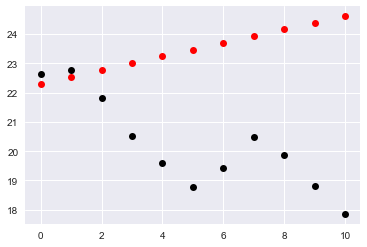

In [261]:
plt.plot(np.array(Y_test), 'o', color='black')
plt.plot(predictions[0], 'o', color='red')

In [267]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(np.array(Y_train),order=(1,1,0))
f=model.fit()
print(f.aic)
predictions=f.forecast(steps=11)

1295.664571216636


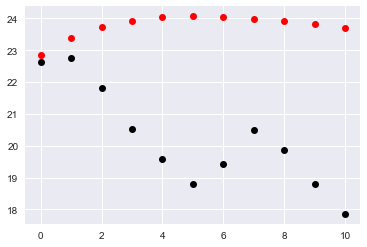

In [268]:
plt.plot(np.array(Y_test), 'o', color='black')
plt.plot(predictions[0], 'o', color='red')

In [269]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(np.array(Y_train),order=(1,1,1))
f=model.fit()
print(f.aic)
predictions=f.forecast(steps=11)

1286.3920114979205


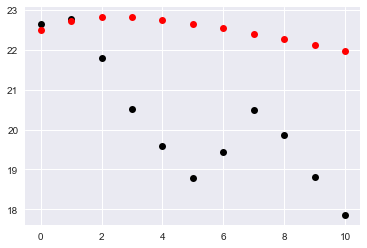

In [270]:
plt.plot(np.array(Y_test), 'o', color='black')
plt.plot(predictions[0], 'o', color='red')

In [276]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [293]:
#All values of p,d,q are not correct
import warnings
warnings.filterwarnings('ignore')
minimum=10000000
for i in pdq:
    try:
        model=ARIMA(np.array(Y_train),order=i)
        f=model.fit()
        print(f.aic)
        print(mean_squared_error(Y_test,predictions[0]))
        if(minimum>f.aic):
            minimum=f.aic
            param=i
        predictions=f.forecast(steps=11)
    except:
        continue


2633.961293890095
0.7170002600606689
2279.264296244795
1232.6186476242674
1494.880378675311
1152.9482889401002
1349.6320141460676
1.7915898825459722
1280.5606771890743
1.5820758942152755
1277.0944715056771
3.513332198888189
1328.439680043711
5.214174624412326
1328.631949464996
104.01301672497424
1330.6319438736055
85.85383663048823
1292.7649877116655
85.85987648404526
1282.3772353121328
0.6271220371840399
1505.719127514954
0.685711240629076
1359.7422823999086
15.205404731450493
1299.8536464362421
18.793878814465128
1288.8905817195464
32.55050939392755
1284.342388428117
45.69978314265652
1295.664571216636
65.56069281184537
1286.3920114979205
15.669961498046975
1278.6790733568398
7.1159124457121035
1279.2904799335229
5.685916871045503
1328.6973753783777
5.006201681342247
1296.8511584572036
87.14074736794431
1287.786740802882
10.1305563716716
1280.225951855596
2.687573048048851
1280.8751679520828
1.635886078358218
1300.4780125405812
1.2542455935072072
1292.6376130278263
125.46068717129702

In [288]:
param

(2, 1, 1)

In [289]:
minimum

1272.9109575935624

In [290]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(np.array(Y_train),order=(2,1,1))
f=model.fit()
print(f.aic)
predictions=f.forecast(steps=11)

1272.9109575935624


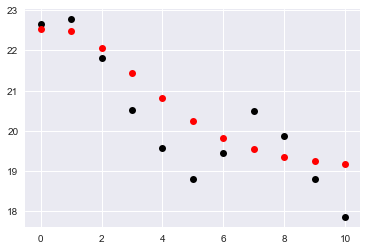

In [291]:
plt.plot(np.array(Y_test), 'o', color='black')
plt.plot(predictions[0], 'o', color='red')

In [292]:
mean_squared_error(Y_test,predictions[0])

0.7170002600606689